# ДЗ: Подмена надписи/элементов логотипа по **двум цветам**

- Выбранный логотип: **Пятёрочка**
- Два разных фона: **апельсины** и **космос**
- Правило подмены: **красные** области → апельсины, **зелёные** области → космос.
        
Для устойчивого выделения используем HSV-порог: работаем по тону (Hue), насыщенности и яркости.


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from pathlib import Path
import cv2

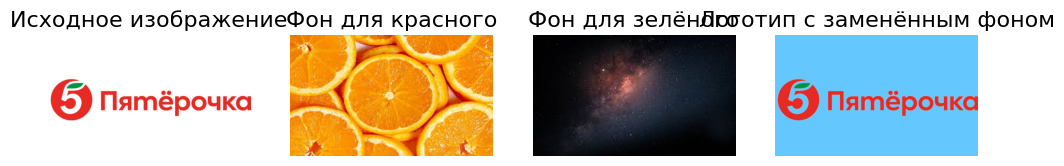

In [2]:
logo = Image.open("pyaterochka.png").convert("RGB")
bg_red = Image.open("images.jpg").convert("RGB").resize(logo.size, Image.LANCZOS)
bg_green = Image.open("Космос.jpg").convert("RGB").resize(logo.size, Image.LANCZOS)

plt.figure(figsize=(12,8))
logo_arr = cv2.cvtColor(np.array(logo), cv2.COLOR_RGB2BGR)
bg_red_arr = cv2.cvtColor(np.array(bg_red), cv2.COLOR_RGB2BGR)
bg_green_arr = cv2.cvtColor(np.array(bg_green), cv2.COLOR_RGB2BGR)
b, g, r = cv2.split(logo_arr)
white_mask = (r > 220) & (g > 220) & (b > 220)
logo_arr[white_mask] = (255, 200, 100)
plt.subplot(1,4,1)
plt.imshow(logo)
plt.axis('off')
plt.title("Исходное изображение", fontsize=16)
plt.subplot(1,4,2)
plt.imshow(bg_red)
plt.axis('off')
plt.title("Фон для красного", fontsize=16)
plt.subplot(1,4,3)
plt.imshow(bg_green)
plt.axis('off')
plt.title("Фон для зелёного", fontsize=16)
plt.subplot(1,4,4)
plt.imshow(logo_arr[:, :, ::-1])
plt.axis('off')
plt.title("Логотип с заменённым фоном", fontsize=16)
plt.show()


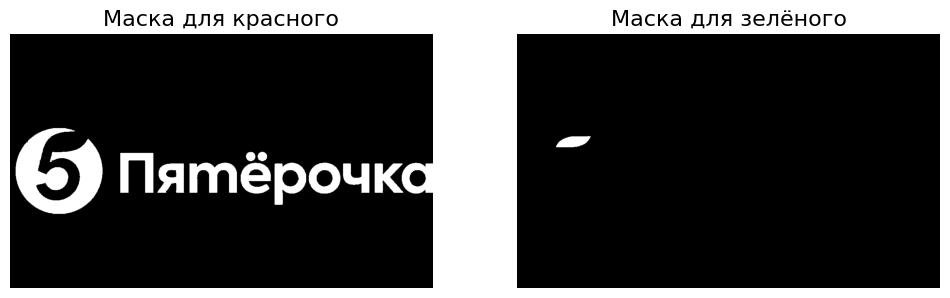

In [3]:

b, g, r = cv2.split(logo_arr)
red_mask = (r > 120) & (r > g * 1.2) & (r > b * 1.2)
green_mask = (g > 100) & (g > r * 1.2) & (g > b * 1.2)

red_mask = red_mask.astype(np.uint8) * 255
green_mask = green_mask.astype(np.uint8) * 255

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(red_mask, cmap='gray')
plt.axis('off')
plt.title("Маска для красного", fontsize=16)
plt.subplot(1,2,2)
plt.imshow(green_mask, cmap='gray')
plt.axis('off')
plt.title("Маска для зелёного", fontsize=16)
plt.show()

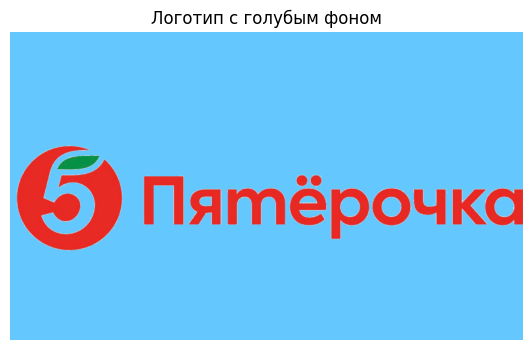

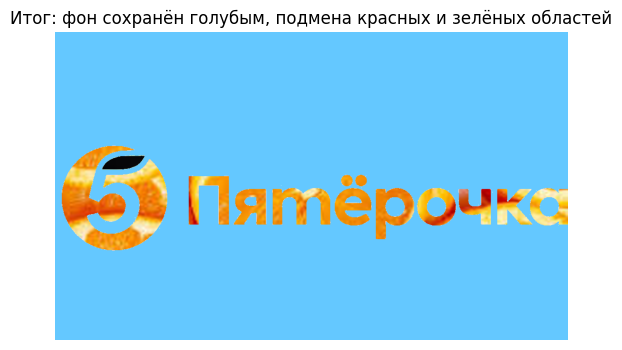

In [4]:
# Основа — голубой логотип (фон уже перекрашен)
result = logo_arr.copy()

red_area = cv2.bitwise_and(bg_red_arr, bg_red_arr, mask=red_mask)
green_area = cv2.bitwise_and(bg_green_arr, bg_green_arr, mask=green_mask)

# Обнуляем эти области в логотипе
masked_logo = cv2.bitwise_and(result, result, mask=cv2.bitwise_not(cv2.bitwise_or(red_mask, green_mask)))

# Складываем всё вместе: голубой логотип + подменённые области
result = cv2.bitwise_or(masked_logo, red_area)
result = cv2.bitwise_or(result, green_area)

plt.figure(figsize=(10,4))
plt.imshow(cv2.cvtColor(logo_arr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Логотип с голубым фоном")

plt.figure(figsize=(10,4))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Итог: фон сохранён голубым, подмена красных и зелёных областей")
plt.show()